<a href="https://colab.research.google.com/github/kaliappan01/Exploring_ML_models/blob/main/Density_based_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from scipy.cluster.hierarchy import linkage
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [73]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
features_scaled = std_scl.fit_transform(X)

In [74]:
Z = linkage(features_scaled,'ward')
n = len(Z)

In [75]:
linkage_matrix = pd.DataFrame(data = Z, columns = ['cluster_1',"cluster_2","distance","n_objects"],
                              index = range(1,n+1))
for col in ['cluster_1',"cluster_2","distance","n_objects"]:
  linkage_matrix[col]  = linkage_matrix[col].astype(int)
linkage_matrix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 1 to 149
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   cluster_1  149 non-null    int64
 1   cluster_2  149 non-null    int64
 2   distance   149 non-null    int64
 3   n_objects  149 non-null    int64
dtypes: int64(4)
memory usage: 4.8 KB


In [76]:
from scipy.spatial.distance import pdist
methods = ['single', 'complete', 'average', 'ward']
pairwise_dist = pdist(features_scaled)

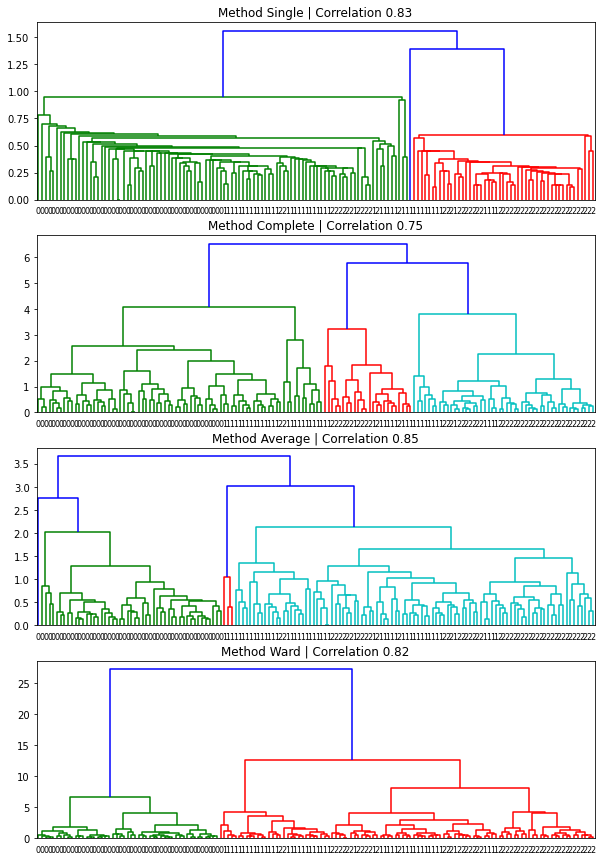

In [96]:
from scipy.cluster.hierarchy import cophenet,dendrogram
fig, axes = plt.subplots(figsize = (10,15),nrows = 4,sharex = True)
axes = axes.flatten()
for i,method in enumerate(methods):
  z = linkage(features_scaled, method)
  c, coph_dists = cophenet(z, pairwise_dist)
  dendrogram(z, labels = iris.target
             ,orientation = 'top', leaf_rotation = 0, leaf_font_size = 8, ax = axes[i])
  axes[i].set_title("Method {} | Correlation {:.2f}".format(method.capitalize(),c))

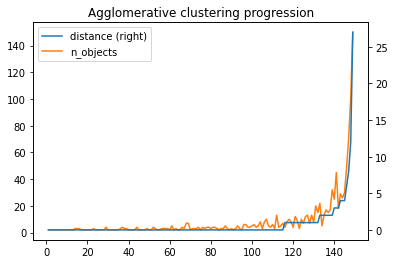

In [78]:
linkage_matrix[['distance', 'n_objects']].plot(secondary_y = ["distance"],title= "Agglomerative clustering progression")

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
features_2D = pca.fit_transform(features_scaled)

In [80]:
def get_2d_coords():
  points = pd.DataFrame(features_2D).assign(n=1)
  return dict(enumerate(points.values.tolist()))

In [95]:
n_clusters = Z.shape[0]
points = get_2d_coords()
cluster_states = {0: get_2d_coords()}
for i, cluster in enumerate(Z[:, :2], 1):
  cluster_state = dict(cluster_states[i-1])
  merged_points = np.array([cluster_state.pop(c) for c in cluster])
  cluster_size = merged_points[:,2]
  new_point = np.average(merged_points[:, :2],
                          axis = 0, weights = cluster_size).tolist()
  new_point.append(cluster_size.sum())
  cluster_state[n_clusters + i] = new_point
  cluster_state[i] = cluster_state

KeyError: ignored

In [97]:
n = len(Z)
from collections import OrderedDict
clusters = OrderedDict()
for i,row in enumerate(Z,1):
  cluster = []
  for c in row[:2]:
    if c<=n:
      cluster.append(int(c))
    else:
      cluster+= clusters[int(c)]
  clusters[n+i] = cluster

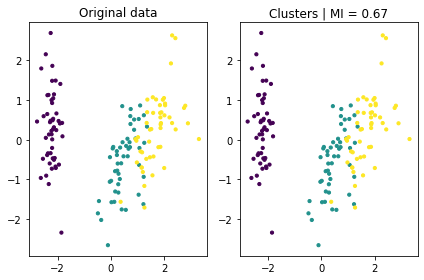

In [98]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_mutual_info_score
data = pd.DataFrame(np.column_stack([X,y]),columns = iris.feature_names+["label"])
cluster_maker = AgglomerativeClustering(n_clusters = 3)
data["clusters"] = cluster_maker.fit_predict(features_scaled)
fig, axes = plt.subplots(ncols = 2)
labels, clusters = y,data.clusters
mi = adjusted_mutual_info_score(y, clusters)
axes[0].scatter(*features_2D.T, c = y,s=10)
axes[0].set_title("Original data")
axes[1].scatter(*features_2D.T, c = y,s=10)
axes[1].set_title("Clusters | MI = {:.2f}".format(mi))
plt.tight_layout()

In [99]:
from sklearn.cluster import DBSCAN

def cluster_cmp(cluster_mk):
  data["clusters"] = cluster_mk.fit_predict(features_scaled)
  fig, axes = plt.subplots(ncols = 2)
  labels, clusters = y,data.clusters
  mi = adjusted_mutual_info_score(y, clusters)
  axes[0].scatter(*features_2D.T, c = y,s=10)
  axes[0].set_title("Original data")
  axes[1].scatter(*features_2D.T, c = y,s=10)
  axes[1].set_title("Clusters | MI = {:.2f}".format(mi))
  plt.tight_layout()

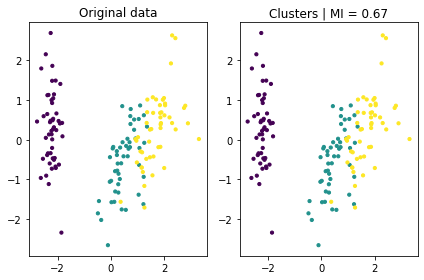

In [100]:
cluster_cmp(AgglomerativeClustering(n_clusters=3))

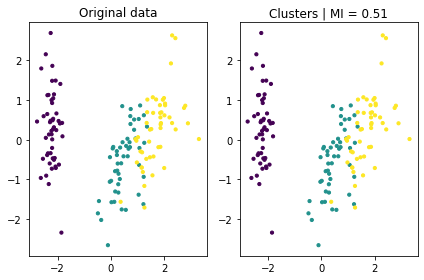

In [101]:
cluster_cmp(DBSCAN())

In [102]:
eps_range  = np.arange(.2,.91,.05)
min_samples_range = list(range(2,10))
labels = y
mi = {}
for eps in eps_range:
  for min_samples in min_samples_range:
    clusterer = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = clusterer.fit_predict(features_scaled)
    mi[(eps,min_samples)] = adjusted_mutual_info_score(clusters,y)

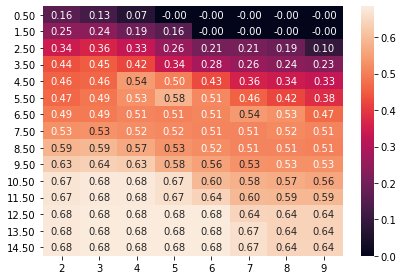

In [103]:
results = pd.Series(mi)
results.index = pd.MultiIndex.from_tuples(results.index)
fig, axes = plt.subplots()
ax = sns.heatmap(results.unstack(), annot = True, fmt = ".2f")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.2f'))
plt.tight_layout()

DBSCAN using python

In [105]:
cmap = 'CMRmap'
def plot_dbscan(data, assignments, axes, delay=.5):
  for ax in axes:
      ax. clear()
  xmin, ymin = data[['x', 'y']].min()
  xmax, ymax = data[['x', 'y']].max()

  data.plot.scatter(x='x', y='y', c=data.label, cmap=cmap, s=10,
  title='Original Data', ax=axes[0], colorbar=False)
  plot_data. clusters = plot_data. index.map(assignments . get)
  db_data= data. fillna(0) [data. clusters.notnull( ) ]
  db_data.plot.scatter(x='x', y='y', cmap=cmap, colorbar=False,
  xlim=(xmin, xmax), ylim=(ymin, ymax),
  c=db_data. clusters, s=10, title='DBSCAN', ax=axes[1])
  fig.canvas.draw()
  time.sleep(delay)


In [106]:
def run_dbscan(point, members):
  members.add(point)
  neighbors = kdtree.query_radius(np.atleast_2d(data_[point]),eps)[0]
  if len(neighbors)<min_samples:
    return members | set(neighbors)
  else:
    for neighbor in set(neighbors) - set(members):
      members.update(run_dbscan(neighbor, members))
  return members

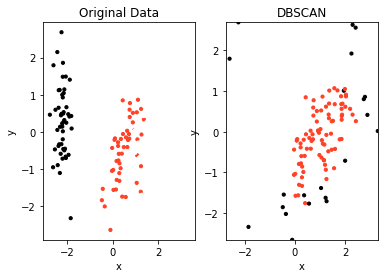

In [107]:
from sklearn.neighbors import KDTree
import time
import random
eps, min_samples = .6,5
data_ = features_scaled.copy()
kdtree = KDTree(data_)


to_do = list (range(len(data_)))
plot_data = pd. DataFrame(data=np.c_[features_2D, labels],
columns=['x', 'y', 'label']) . assign(clusters=np. nan)
random.shuffle(to_do)

n_clusters = 1
fig, axes = plt. subplots(ncols=2)
assignments = {}
while to_do:
  item = to_do. pop()
  neighbors = kdtree. query_radius(np.atleast_2d(data_[item, :]), eps) [0]
  if len(neighbors) < min_samples:
    assignments [item] = 0
    plot_dbscan(plot_data, assignments, axes)
  else :
    new_cluster = run_dbscan(item, set())
    to_do = [t for t in to_do if t not in new_cluster]
    for member in new_cluster:
      assignments.update({member:n_clusters})
    n_clusters+=1


In [108]:
!pip install hdbscan

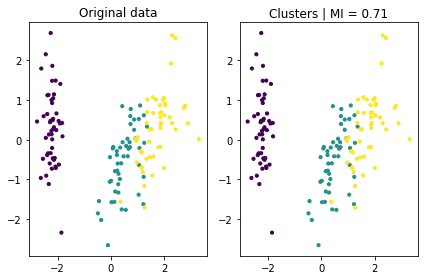

In [109]:
from hdbscan import HDBSCAN
cluster_cmp(HDBSCAN())

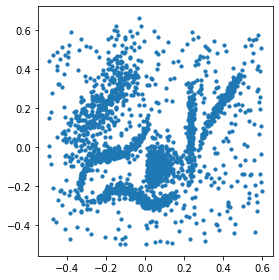

In [110]:
clusterable_data = np.load("/content/clusterable_data.npy")
fig,ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(*clusterable_data.T,s=10)
plt.tight_layout()

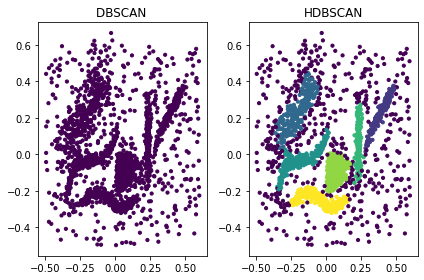

In [114]:
hdbscan = HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
clusterable_hdbscan = hdbscan.fit_predict(clusterable_data)
dbscan2 = DBSCAN(eps = .2,min_samples=10)
clusterable_dbscan = dbscan2.fit_predict(clusterable_data)
fig,axes = plt.subplots(ncols = 2)
axes[0].scatter(*clusterable_data.T, c = clusterable_dbscan,s=10)
axes[0].set_title("DBSCAN ")
axes[1].scatter(*clusterable_data.T, c = clusterable_hdbscan,s=10)
axes[1].set_title("HDBSCAN")
plt.tight_layout()

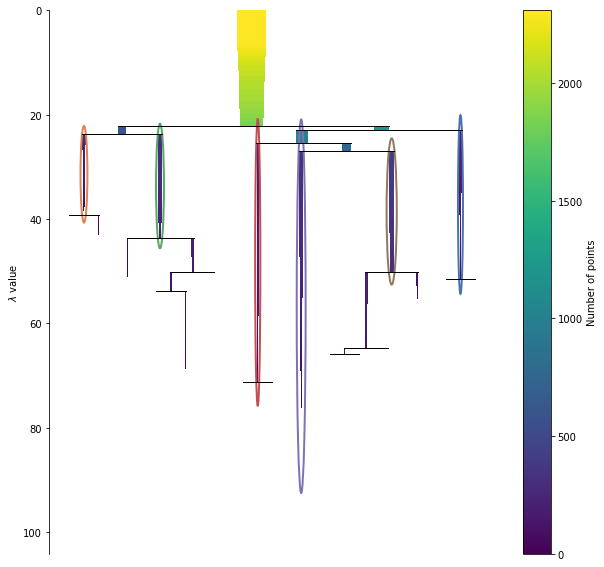

In [117]:
plt.figure(figsize=(10,10))              
hdbscan.condensed_tree_.plot(select_clusters = True,
                        selection_palette = sns.color_palette('deep',8))


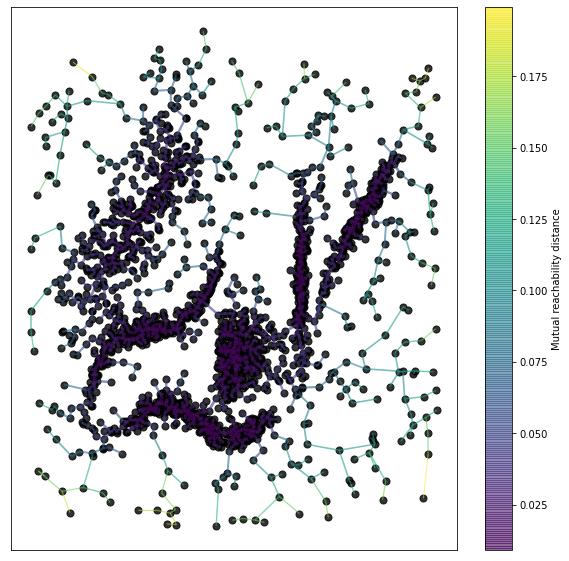

In [116]:
plt.figure(figsize=(10,10))              
hdbscan.minimum_spanning_tree_.plot(edge_cmap = 'viridis',
                                    edge_alpha = 0.6,node_size = 50,
                                    edge_linewidth = 1)